In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn import tree

In [2]:
bank = pd.read_csv(r"D:\ML Test 25\bank.csv", delimiter=';')
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
bank.dtypes.value_counts()

object     11
int64       5
float64     5
dtype: int64

## 1. Missing values

In [5]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

***
* There are no missing values 
***

#### Treat duplicate values

In [6]:
bank.duplicated().sum()

12

In [7]:
bank.drop_duplicates(inplace=True)

In [8]:
bank.duplicated().sum()

0

In [9]:
bank.dtypes.value_counts()

object     11
int64       5
float64     5
dtype: int64

In [10]:
bank_cat=bank.dtypes[bank.dtypes=="object"].index
bank_num= bank.dtypes[bank.dtypes!="object"].index

print(bank_cat)
print(bank_num)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [11]:
for i in bank_num:
    print(bank[i].index)
    print(bank[i].value_counts())

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            41178, 41179, 41180, 41181, 41182, 41183, 41184, 41185, 41186,
            41187],
           dtype='int64', length=41176)
31    1947
32    1845
33    1833
36    1779
35    1758
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64
Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            41178, 41179, 41180, 41181, 41182, 41183, 41184, 41185, 41186,
            41187],
           dtype='int64', length=41176)
90      170
85      170
136     168
73      167
124     163
       ... 
1569      1
1053      1
1263      1
1169      1
1868      1
Name: duration, Length: 1544, dtype: int64
Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            41178, 41179, 41180, 41181, 41182, 41183, 41184, 41185, 

***
* There are not categoical type columns in Num columns
***

#### Primary Analysis for categorical Feature

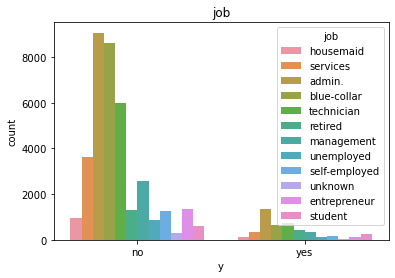

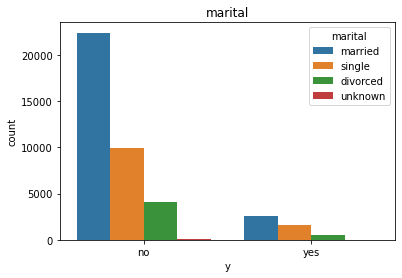

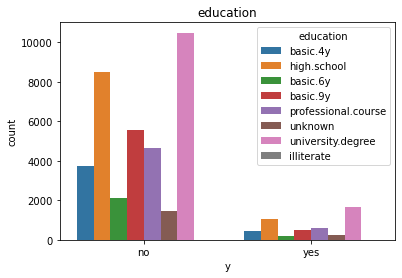

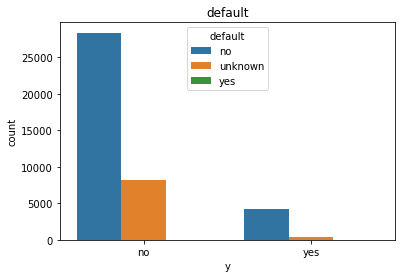

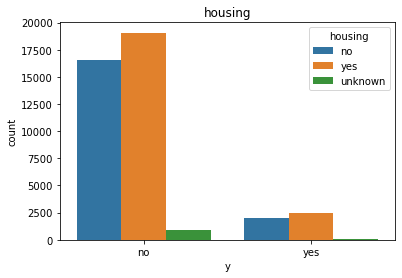

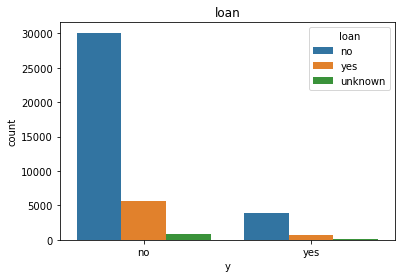

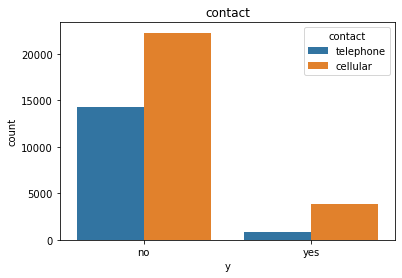

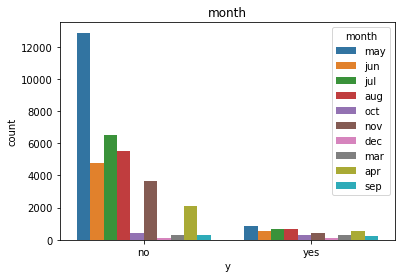

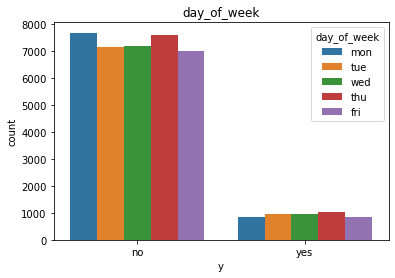

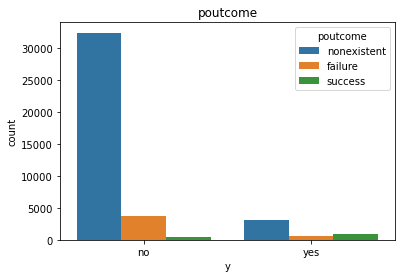

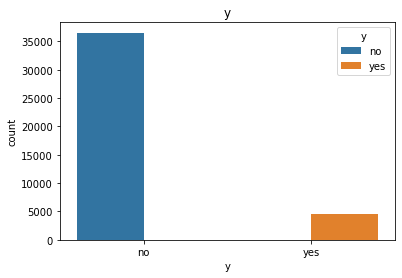

In [12]:
for i in bank_cat:
    sns.countplot(x=bank['y'],hue=bank[i])
    plt.title(i)
    plt.show()

##### Understand by graph:
***

* job: from the graph most people subscribed is [admin] and most people whos did not subscribed is [admin]

* martial: from the graph most people subscribed is [married] and most people whos did not subscribed is [married]

* education: from the graph most people subscribed is [illiterate] and most people whos did not subscribed is [illiterate]

* default: from the graph most people subscribed is [non-defaulter] and most people whos did not subscribed is [non-defaulter]

* housing: from the graph most people subscribed is [having house loan] and most people whos did not subscribed is [having house loan]


* Loan: from the graph most people subscribed is [having no loan] and most people whos did not subscribed is [haveing no loan]

* contact:  from the graph most people subscribed is [cellular user] and most people whos did not subscribed is [cellular user]

*  month: people who have may as their last contact month subscibred the most from people of all other month and people who have may as their last contact month are also the one in majority who have not subscribed the most

*     day_of_week: people whom we last contacted on monday are the one who didn't subscribed the most and people whom we last contacted on thursday are the one who did subscribed the most    
    
*    poutcome: as per previous market analysis people who subscribed the most are nonexistent and people who didnt subscribed are also nonexistent  

***

In [13]:
bank['education'].value_counts()

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

***
* here in education we get 3 similar category(basic.4y,basic.9y,basic.6y) we can merge them 
  to reduce our different types in this column
***    


In [14]:
bank["education"]=bank["education"].replace(["basic.9y", "basic.4y", "basic.6y"], 'basic')

In [15]:
bank['education'].value_counts()

basic                  12512
university.degree      12164
high.school             9512
professional.course     5240
unknown                 1730
illiterate                18
Name: education, dtype: int64

### Outliers Treatment

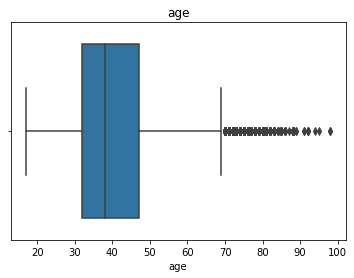

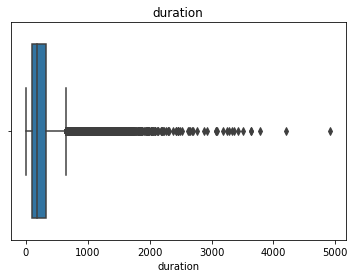

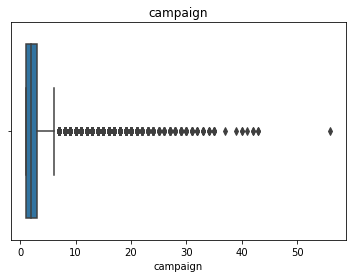

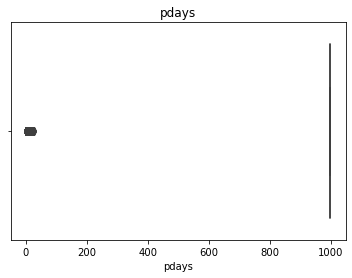

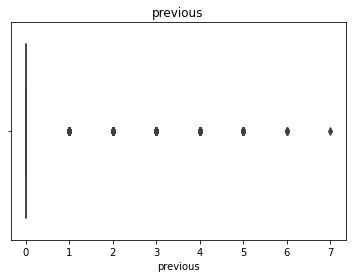

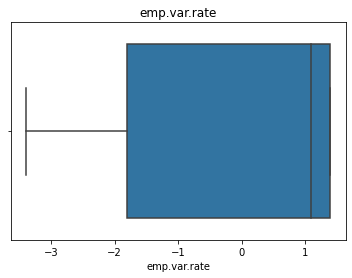

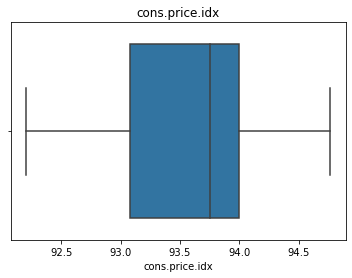

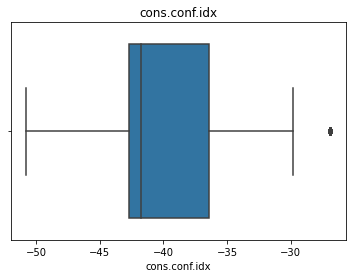

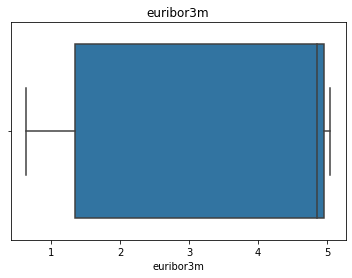

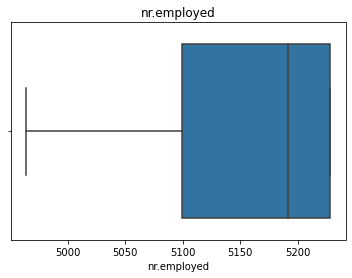

In [16]:
for i in bank_num: # for finding outliers 
    sns.boxplot(x=bank[i])
    plt.title(i)
    plt.show()

***
* age , duration ,campaign, previous have outliers in large amount and pdays, cons.conf.idx have minimal outliers
***

In [17]:
bank.describe(percentiles=[0.01,0.02,0.03,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,50%,97%,98%,99%,max
age,41176.0,40.023800,10.420680,17.000,23.000,24.000,25.000,38.000,59.000,62.000,71.000,98.000
duration,41176.0,258.315815,259.305321,0.000,11.000,17.000,23.000,180.000,911.000,1052.500,1271.250,4918.000
campaign,41176.0,2.567879,2.770318,1.000,1.000,1.000,1.000,2.000,9.000,11.000,14.000,56.000
pdays,41176.0,962.464810,186.937102,0.000,3.000,6.000,9.000,999.000,999.000,999.000,999.000,999.000
previous,41176.0,0.173013,0.494964,0.000,0.000,0.000,0.000,0.000,1.000,2.000,2.000,7.000
emp.var.rate,41176.0,0.081922,1.570883,-3.400,-3.400,-3.400,-3.000,1.100,1.400,1.400,1.400,1.400
cons.price.idx,41176.0,93.575720,0.578839,92.201,92.201,92.379,92.431,93.749,94.465,94.465,94.465,94.767
cons.conf.idx,41176.0,-40.502863,4.627860,-50.800,-49.500,-47.100,-47.100,-41.800,-31.400,-30.100,-26.900,-26.900
euribor3m,41176.0,3.621293,1.734437,0.634,0.658,0.714,0.720,4.857,4.967,4.968,4.968,5.045
nr.employed,41176.0,5167.034870,72.251364,4963.600,4963.600,4991.600,4991.600,5191.000,5228.100,5228.100,5228.100,5228.100


***
* There are outliers in min Max both so we treat both with percentile method
***

In [18]:
def outliers_cap(x):
    x=x.clip(upper=x.quantile(0.99))
    x=x.clip(lower=x.quantile(0.01))
    return x

In [19]:
outliers_columns = ['age','duration','campaign','previous','nr.employed', 'pdays','cons.conf.idx']

In [20]:
bank[outliers_columns] = bank[outliers_columns].apply(outliers_cap)

### we create a copy

In [21]:
bank1 = bank.copy()
bank1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
lb = LabelEncoder()
for i in bank_cat:
    bank1[i] = lb.fit_transform(bank1[i])

In [24]:
bank1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,3,1,0,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,7,1,1,1,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,7,1,1,0,2,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,0,1,0,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,7,1,1,0,0,2,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [25]:
bank1.dtypes.value_counts()

int32      11
float64    10
dtype: int64

***
* We convert all cat. columns to numerical 
*** 

In [26]:
x = bank1.drop('y',axis=1)
y =bank['y']


In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state= 0)

In [28]:
x_train.shape

(30882, 20)

In [29]:
y_train.shape

(30882,)

In [30]:
x_test.shape

(10294, 20)

In [31]:
y_test.shape

(10294,)

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve

In [33]:
def gen_metrics(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    print('Prediction\n',y_pred)
    print('Training score',train_score)
    print('Testing score',test_score)
    print('Accuracy_Score',acc)
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,y_pred))
    auc_score  = roc_auc_score(y_test,model.predict_proba(x_test)[:,1])
    print('AUC Score',auc_score)
    return acc,auc_score,train_score,test_score


In [34]:
E1 = RandomForestClassifier(n_estimators=110,criterion='gini',max_depth=10,min_samples_split=15)

acc,auc_score1,train_score1,test_score1=gen_metrics(E1,x_train,x_test,y_train,y_test)

Prediction
 ['no' 'no' 'no' ... 'no' 'no' 'no']
Training score 0.9367916585713361
Testing score 0.9109189819312221
Accuracy_Score 0.9109189819312221
Confusion Matrix
 [[8900  200]
 [ 717  477]]
Classification Report
               precision    recall  f1-score   support

          no       0.93      0.98      0.95      9100
         yes       0.70      0.40      0.51      1194

    accuracy                           0.91     10294
   macro avg       0.82      0.69      0.73     10294
weighted avg       0.90      0.91      0.90     10294

AUC Score 0.9483456660592339


In [35]:
print(acc,auc_score1,train_score1,test_score1)

0.9109189819312221 0.9483456660592339 0.9367916585713361 0.9109189819312221


### Select important features based on Random Forest

In [36]:
imp_feat = pd.DataFrame({'Features':x_train.columns,
                       'Norm_Imp':E1.feature_importances_*100}) # E1.feature_importances_*100 for converting it into percentage

imp_feat.sort_values('Norm_Imp',ascending=False)

,Features,Norm_Imp
10,duration,39.284125
18,euribor3m,12.705283
19,nr.employed,10.667367
12,pdays,6.557543
17,cons.conf.idx,4.463569
14,poutcome,4.063146
15,emp.var.rate,3.840072
16,cons.price.idx,3.296690
0,age,3.171824
8,month,2.500485


### taking for selecting important features is 1.780250

In [37]:
sig_feat = imp_feat[imp_feat['Norm_Imp']>=1.780250]

sig_feat.sort_values(by='Norm_Imp',ascending=False)

,Features,Norm_Imp
10,duration,39.284125
18,euribor3m,12.705283
19,nr.employed,10.667367
12,pdays,6.557543
17,cons.conf.idx,4.463569
14,poutcome,4.063146
15,emp.var.rate,3.840072
16,cons.price.idx,3.296690
0,age,3.171824
8,month,2.500485


In [38]:
x_sig = bank1[sig_feat['Features'].values]
x_sig


,age,month,duration,pdays,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56.0,6,261.0,999.0,1,1.1,93.994,-36.4,4.857,5191.0
1,57.0,6,149.0,999.0,1,1.1,93.994,-36.4,4.857,5191.0
2,37.0,6,226.0,999.0,1,1.1,93.994,-36.4,4.857,5191.0
3,40.0,6,151.0,999.0,1,1.1,93.994,-36.4,4.857,5191.0
4,56.0,6,307.0,999.0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,71.0,7,334.0,999.0,1,-1.1,94.767,-49.5,1.028,4963.6
41184,46.0,7,383.0,999.0,1,-1.1,94.767,-49.5,1.028,4963.6
41185,56.0,7,189.0,999.0,1,-1.1,94.767,-49.5,1.028,4963.6
41186,44.0,7,442.0,999.0,1,-1.1,94.767,-49.5,1.028,4963.6


***
* here we have selected important features based on Random forest<br>
* its not clear in question that we need to use this significant features in model building but its wriiten that we need to select imp features
 so after selecting we have to utilized them so we are going to use these features in model building rather than using full datafram feature
    ***

## Handling unbalanced data using SMOTE

In [39]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [40]:
Counter(y)

Counter({'no': 36537, 'yes': 4639})

***
* data is clearly unbalanced
***

In [41]:
print(x_sig.shape)
print(y.shape)

(41176, 10)
(41176,)


In [42]:
sm = SMOTE()
x_sm,y_sm = sm.fit_resample(x_sig,y)

In [43]:
print(x_sm.shape)
print(x_test.shape)

print(y_sm.shape)
print(y_test.shape)

(73074, 10)
(10294, 20)
(73074,)
(10294,)


### Standardize the data using the anyone of the scalers provided by sklearn


***
* usually standardization applied before splitting but here we have already splitted because its provided in the problem statement so now we have to apply scalling on all train and test features
***

In [44]:
sc = StandardScaler()

In [45]:
x_sm_std = sc.fit_transform(x_sm)

*** 
* split new train test value
***

In [46]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x_sm_std,y_sm,test_size=0.25,random_state=15)
print(x_train1.shape)
print(x_test1.shape)
print(y_train1.shape)
print(y_test1.shape)


(54805, 10)
(18269, 10)
(54805,)
(18269,)


In [47]:
models = pd.DataFrame(columns=["Model", "Accuracy", "auc_score", "training_score",'test_score'])
models

,Model,Accuracy,auc_score,training_score,test_score


# Building Supervised model

### Logistic regression

In [48]:
from sklearn.linear_model import LogisticRegression
m2 = LogisticRegression() 
m2.fit(x_train1,y_train1)

LogisticRegression()

In [49]:
acc,auc_score1,train_score1,test_score1=gen_metrics(m2,x_train1,x_test1,y_train1,y_test1)

Prediction
 ['yes' 'no' 'no' ... 'yes' 'no' 'yes']
Training score 0.8621841072894809
Testing score 0.8591603262356998
Accuracy_Score 0.8591603262356998
Confusion Matrix
 [[7799 1408]
 [1165 7897]]
Classification Report
               precision    recall  f1-score   support

          no       0.87      0.85      0.86      9207
         yes       0.85      0.87      0.86      9062

    accuracy                           0.86     18269
   macro avg       0.86      0.86      0.86     18269
weighted avg       0.86      0.86      0.86     18269

AUC Score 0.9315526420612529


In [50]:
new_row = {"Model": "LogisticRegression","Accuracy":acc, "auc_score":auc_score1, "training_score":train_score1,'test_score':test_score1}
models = models.append(new_row,ignore_index=True)
models


C:\Users\hp\AppData\Local\Temp\ipykernel_35260\3591710335.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row,ignore_index=True)


,Model,Accuracy,auc_score,training_score,test_score
0,LogisticRegression,0.85916,0.931553,0.862184,0.85916


# Adaboost

In [51]:
from sklearn.ensemble import AdaBoostClassifier

In [52]:
clf = AdaBoostClassifier(random_state=10)

In [53]:
acc2,auc_score2,train_score2,test_score2=gen_metrics(clf,x_train1,x_test1,y_train1,y_test1)

Prediction
 ['yes' 'no' 'no' ... 'yes' 'no' 'yes']
Training score 0.8858315847094244
Testing score 0.8823690404510373
Accuracy_Score 0.8823690404510373
Confusion Matrix
 [[7995 1212]
 [ 937 8125]]
Classification Report
               precision    recall  f1-score   support

          no       0.90      0.87      0.88      9207
         yes       0.87      0.90      0.88      9062

    accuracy                           0.88     18269
   macro avg       0.88      0.88      0.88     18269
weighted avg       0.88      0.88      0.88     18269

AUC Score 0.9517215282231906


In [54]:
new_row = {"Model": "AdaBoost","Accuracy":acc2, "auc_score":auc_score2, "training_score":train_score2,'test_score':test_score2}
models = models.append(new_row,ignore_index=True)
models

C:\Users\hp\AppData\Local\Temp\ipykernel_35260\1899723344.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row,ignore_index=True)


,Model,Accuracy,auc_score,training_score,test_score
0,LogisticRegression,0.85916,0.931553,0.862184,0.85916
1,AdaBoost,0.882369,0.951722,0.885832,0.882369


# Naive bayes

In [55]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [56]:
gaussiannb= GaussianNB(priors=[0.5,0.5])

In [57]:
acc3,auc_score3,train_score3,test_score3=gen_metrics(gaussiannb,x_train1,x_test1,y_train1,y_test1)

Prediction
 ['yes' 'no' 'no' ... 'yes' 'no' 'yes']
Training score 0.795310646838792
Testing score 0.7980732388198588
Accuracy_Score 0.7980732388198588
Confusion Matrix
 [[7584 1623]
 [2066 6996]]
Classification Report
               precision    recall  f1-score   support

          no       0.79      0.82      0.80      9207
         yes       0.81      0.77      0.79      9062

    accuracy                           0.80     18269
   macro avg       0.80      0.80      0.80     18269
weighted avg       0.80      0.80      0.80     18269

AUC Score 0.8851045488332706


In [58]:
new_row = {"Model": "Naive_gaussian","Accuracy":acc3, "auc_score":auc_score3, "training_score":train_score3,'test_score':test_score3}
models = models.append(new_row,ignore_index=True)
models

C:\Users\hp\AppData\Local\Temp\ipykernel_35260\1746496927.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row,ignore_index=True)


,Model,Accuracy,auc_score,training_score,test_score
0,LogisticRegression,0.85916,0.931553,0.862184,0.85916
1,AdaBoost,0.882369,0.951722,0.885832,0.882369
2,Naive_gaussian,0.798073,0.885105,0.795311,0.798073


# KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
knn = KNeighborsClassifier(n_neighbors=7)

In [61]:
acc4,auc_score4,train_score4,test_score4=gen_metrics(gaussiannb,x_train1,x_test1,y_train1,y_test1)

Prediction
 ['yes' 'no' 'no' ... 'yes' 'no' 'yes']
Training score 0.795310646838792
Testing score 0.7980732388198588
Accuracy_Score 0.7980732388198588
Confusion Matrix
 [[7584 1623]
 [2066 6996]]
Classification Report
               precision    recall  f1-score   support

          no       0.79      0.82      0.80      9207
         yes       0.81      0.77      0.79      9062

    accuracy                           0.80     18269
   macro avg       0.80      0.80      0.80     18269
weighted avg       0.80      0.80      0.80     18269

AUC Score 0.8851045488332706


In [62]:
new_row = {"Model": "KNN","Accuracy":acc4, "auc_score":auc_score4, "training_score":train_score4,'test_score':test_score4}
models = models.append(new_row,ignore_index=True)
models

C:\Users\hp\AppData\Local\Temp\ipykernel_35260\3584283136.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row,ignore_index=True)


,Model,Accuracy,auc_score,training_score,test_score
0,LogisticRegression,0.85916,0.931553,0.862184,0.85916
1,AdaBoost,0.882369,0.951722,0.885832,0.882369
2,Naive_gaussian,0.798073,0.885105,0.795311,0.798073
3,KNN,0.798073,0.885105,0.795311,0.798073


# SVM

In [63]:
from sklearn.svm import SVC

In [64]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [65]:
hparams_svc = {'kernel':['linear','poly'],
              'C':[0.001,0.01,0.1,1,10],
              'degree':[1,2,3]}

print(hparams_svc)

{'kernel': ['linear', 'poly'], 'C': [0.001, 0.01, 0.1, 1, 10], 'degree': [1, 2, 3]}


In [66]:
svc1 = SVC(kernel='linear',C=1,probability=True)
acc5,auc_score5,train_score5,test_score5=gen_metrics(svc1,x_train1,x_test1,y_train1,y_test1)

Prediction
 ['yes' 'no' 'no' ... 'yes' 'no' 'yes']
Training score 0.8674026092509808
Testing score 0.8637582790519459
Accuracy_Score 0.8637582790519459
Confusion Matrix
 [[7526 1681]
 [ 808 8254]]
Classification Report
               precision    recall  f1-score   support

          no       0.90      0.82      0.86      9207
         yes       0.83      0.91      0.87      9062

    accuracy                           0.86     18269
   macro avg       0.87      0.86      0.86     18269
weighted avg       0.87      0.86      0.86     18269

AUC Score 0.929926623053185


In [67]:
new_row = {"Model": "SVM_linear","Accuracy":acc5, "auc_score":auc_score5, "training_score":train_score5,'test_score':test_score5}
models = models.append(new_row,ignore_index=True)
models

C:\Users\hp\AppData\Local\Temp\ipykernel_35260\4182617133.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row,ignore_index=True)


,Model,Accuracy,auc_score,training_score,test_score
0,LogisticRegression,0.85916,0.931553,0.862184,0.85916
1,AdaBoost,0.882369,0.951722,0.885832,0.882369
2,Naive_gaussian,0.798073,0.885105,0.795311,0.798073
3,KNN,0.798073,0.885105,0.795311,0.798073
4,SVM_linear,0.863758,0.929927,0.867403,0.863758


In [68]:
svc2 = SVC(kernel='poly',degree=3,probability=True)
acc6,auc_score6,train_score6,test_score6=gen_metrics(svc2,x_train1,x_test1,y_train1,y_test1)

Prediction
 ['yes' 'no' 'no' ... 'yes' 'no' 'yes']
Training score 0.8900282820910501
Testing score 0.8868027806667031
Accuracy_Score 0.8868027806667031
Confusion Matrix
 [[7844 1363]
 [ 705 8357]]
Classification Report
               precision    recall  f1-score   support

          no       0.92      0.85      0.88      9207
         yes       0.86      0.92      0.89      9062

    accuracy                           0.89     18269
   macro avg       0.89      0.89      0.89     18269
weighted avg       0.89      0.89      0.89     18269

AUC Score 0.9466609313435121


In [69]:
new_row = {"Model": "SVM_Poly","Accuracy":acc6, "auc_score":auc_score6, "training_score":train_score6,'test_score':test_score6}
models = models.append(new_row,ignore_index=True)
models

C:\Users\hp\AppData\Local\Temp\ipykernel_35260\1340713020.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row,ignore_index=True)


,Model,Accuracy,auc_score,training_score,test_score
0,LogisticRegression,0.85916,0.931553,0.862184,0.85916
1,AdaBoost,0.882369,0.951722,0.885832,0.882369
2,Naive_gaussian,0.798073,0.885105,0.795311,0.798073
3,KNN,0.798073,0.885105,0.795311,0.798073
4,SVM_linear,0.863758,0.929927,0.867403,0.863758
5,SVM_Poly,0.886803,0.946661,0.890028,0.886803


***
* we can see that accuracy, training and testing score of AdaBoost and SVM_poly is very similar so they both are 
    better than the other models so according to tabular performance matrix AdaBoost and SVM_ply is best suited model
***